# Mục 1

In [2]:
# Load dữ liệu thành DataFrame Pandas
import pandas as pd
import numpy as np
from sklearn import preprocessing

df = pd.read_csv('data.csv')

# đặt lại index
df = df.set_index('ID')
df

,First Name,Last Name,Age,Gender,Department,Salary,Date of Joining
ID,,,,,,,
1,John,Doe,25.0,M,Sales,50000.0,01/01/2020
2,Jane,Smith,30.0,F,Marketing,60000.0,06/01/2018
3,Bod,Johnson,45.0,M,HR,70000.0,09/01/2016
4,Alice,Williams,33.0,F,IT,80000.0,02/01/2017
5,James,Brown,27.0,M,Sales,55000.0,03/01/2019
6,Sarah,Lee,NaN,F,Marketing,65000.0,12/01/2018
7,Michael,Davis,39.0,M,HR,NaN,08/01/2015
8,Susan,Miller,42.0,F,IT,90000.0,11/01/2014
9,David,Wilson,28.0,M,Sales,60000.0,05/01/2020


In [3]:
#2. Kiểm tra các giá trị missing
print(df.isnull().sum())
# làm đầy các giá trị missing bằng giá trị trung bình chỉ cho các cột numeric
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

First Name         0
Last Name          0
Age                1
Gender             0
Department         0
Salary             1
Date of Joining    0
dtype: int64


In [4]:
#3. Kiểm tra giá trị giống nhau
print(df.duplicated().sum())
# loại bỏ các dòng giống nhau
df = df.drop_duplicates()
df

2


,First Name,Last Name,Age,Gender,Department,Salary,Date of Joining
ID,,,,,,,
1,John,Doe,25.000000,M,Sales,50000.000000,01/01/2020
2,Jane,Smith,30.000000,F,Marketing,60000.000000,06/01/2018
3,Bod,Johnson,45.000000,M,HR,70000.000000,09/01/2016
4,Alice,Williams,33.000000,F,IT,80000.000000,02/01/2017
5,James,Brown,27.000000,M,Sales,55000.000000,03/01/2019
6,Sarah,Lee,32.181818,F,Marketing,65000.000000,12/01/2018
7,Michael,Davis,39.000000,M,HR,62272.727273,08/01/2015
8,Susan,Miller,42.000000,F,IT,90000.000000,11/01/2014
9,David,Wilson,28.000000,M,Sales,60000.000000,05/01/2020


In [5]:
# Mã hóa dữ liệu categorical
df = pd.get_dummies(df, columns=['Gender', 'Department'])
for column in df.columns:
    if df[column].dtype == bool:
        df[column] = df[column].astype(int)

In [6]:
# Xử lý dữ liệu datetime
## Chuyển cột date thành một đối tượng datetime
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
## Extract month and day of week from date column
df['month'] = df['Date of Joining'].dt.month
df['day_of_week'] = df['Date of Joining'].dt.day_name()
## Drop the original 'Date' column
df = df.drop('Date of Joining', axis=1)
df

,First Name,Last Name,Age,Salary,Gender_F,Gender_M,Department_HR,Department_IT,Department_Marketing,Department_Sales,month,day_of_week
ID,,,,,,,,,,,,
1,John,Doe,25.000000,50000.000000,0,1,0,0,0,1,1,Wednesday
2,Jane,Smith,30.000000,60000.000000,1,0,0,0,1,0,6,Friday
3,Bod,Johnson,45.000000,70000.000000,0,1,1,0,0,0,9,Thursday
4,Alice,Williams,33.000000,80000.000000,1,0,0,1,0,0,2,Wednesday
5,James,Brown,27.000000,55000.000000,0,1,0,0,0,1,3,Friday
6,Sarah,Lee,32.181818,65000.000000,1,0,0,0,1,0,12,Saturday
7,Michael,Davis,39.000000,62272.727273,0,1,1,0,0,0,8,Saturday
8,Susan,Miller,42.000000,90000.000000,1,0,0,1,0,0,11,Saturday
9,David,Wilson,28.000000,60000.000000,0,1,0,0,0,1,5,Friday


In [7]:
# xử lý các giá trị ngoại lai
# chuẩn hóa và scale dữ liệu
df1 = df.drop(['First Name', 'Last Name', 'day_of_week'], axis=1)
array = df1.values

### Sử dụng RobustScaler() để loại bỏ những giá trị ngoại lai
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(array)
robust_df = pd.DataFrame(robust_df)
print(robust_df)

### Chuẩn hóa dữ liệu bằng phương pháp z-score (Standard)
scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(array)
standard_df = pd.DataFrame(standard, index=df.index)
print('Chuan hoa du lieu:\n', standard_df)

### Scale dữ liệu bằng phương pháp minmax
scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(array)
minmax_df = pd.DataFrame(minmax, index=df.index)
print('Scaling dữ liệu:\n', minmax_df)

          0         1    2    3    4    5         6         7         8
0 -0.799043 -0.890909 -0.5  0.5  0.0  0.0  0.000000  1.333333 -0.818182
1 -0.272727 -0.090909  0.5 -0.5  0.0  0.0  1.333333  0.000000  0.090909
2  1.306220  0.709091 -0.5  0.5  1.0  0.0  0.000000  0.000000  0.636364
3  0.043062  1.509091  0.5 -0.5  0.0  1.0  0.000000  0.000000 -0.636364
4 -0.588517 -0.490909 -0.5  0.5  0.0  0.0  0.000000  1.333333 -0.454545
5 -0.043062  0.309091  0.5 -0.5  0.0  0.0  1.333333  0.000000  1.181818
6  0.674641  0.090909 -0.5  0.5  1.0  0.0  0.000000  0.000000  0.454545
7  0.990431  2.309091  0.5 -0.5  0.0  1.0  0.000000  0.000000  1.000000
8 -0.483254 -0.090909 -0.5  0.5  0.0  0.0  0.000000  1.333333 -0.090909
9  0.253589 -0.490909  0.5 -0.5  0.0  0.0  1.333333  0.000000 -0.272727
Chuan hoa du lieu:
            0         1    2    3    4    5         6         7         8
ID                                                                      
1  -1.369782 -1.264391 -1.0  1.0 -0.5 -0.5

In [8]:
###### 10 equi-width ranges với tất cả các cột của standard_df
df2 = standard_df.copy()
for i in df2.columns:
    df2[f'equi_width_column_{i}'] = pd.cut(x=df2[i], bins=10)
print(f'Roi rac hoa cot cac cot bang 10 equi-width ranges:\n', df2)

Roi rac hoa cot cac cot bang 10 equi-width ranges:
            0         1    2    3    4    5         6         7         8  \
ID                                                                         
1  -1.369782 -1.264391 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -1.420508   
2  -0.575077 -0.405854  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.027853   
3   1.809037  0.452683 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.807740   
4  -0.098254  1.311220  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654 -1.141977   
5  -1.051900 -0.835122 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.863446   
6  -0.228297  0.023415  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654  1.643333   
7   0.855391 -0.210732 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.529209   
8   1.332214  2.169757  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654  1.364802   
9  -0.892959 -0.405854 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.306384   
10  0.219627 -0.835122  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.584915   

   equi_width_column_0 equi_width_c

In [9]:
###### 10 equi-depth ranges với tất cả các cột của standard_df
df3 = standard_df.copy()
for i in df3.columns:
    df3[f'equi_depth_column_{i}'] = pd.qcut(x=df3[i], q=10, duplicates='drop')
print(f'Roi rac hoa cot cac cot bang 10 equi-depth ranges:\n', df3)

Roi rac hoa cot cac cot bang 10 equi-depth ranges:
            0         1    2    3    4    5         6         7         8  \
ID                                                                         
1  -1.369782 -1.264391 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -1.420508   
2  -0.575077 -0.405854  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.027853   
3   1.809037  0.452683 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.807740   
4  -0.098254  1.311220  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654 -1.141977   
5  -1.051900 -0.835122 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.863446   
6  -0.228297  0.023415  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654  1.643333   
7   0.855391 -0.210732 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.529209   
8   1.332214  2.169757  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654  1.364802   
9  -0.892959 -0.405854 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.306384   
10  0.219627 -0.835122  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.584915   

   equi_depth_column_0 equi_depth_c

# Mục 2

In [10]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

df = pd.read_csv('arrhythmia.data', delimiter=',', header=None, na_values='?')
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [11]:
#2. Kiểm tra các giá trị missing
print(df.isnull().sum())
# làm đầy các giá trị missing bằng giá trị trung bình chỉ cho các cột numeric
df.fillna(df.mean(), inplace=True)

0      0
1      0
2      0
3      0
4      0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 280, dtype: int64


In [12]:
#3. Kiểm tra giá trị giống nhau
print(df.duplicated().sum())

0


In [13]:
# xử lý các giá trị ngoại lai
# chuẩn hóa và scale dữ liệu
array = df.values
print(array)

### Sử dụng RobustScaler() để loại bỏ những giá trị ngoại lai
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(array)
robust_df = pd.DataFrame(robust_df)

### Chuẩn hóa dữ liệu bằng phương pháp z-score (Standard)
scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(array)
standard_df = pd.DataFrame(standard)
print('Chuan hoa du lieu:\n', standard_df)

[[ 75.    0.  190.  ...  23.3  49.4   8. ]
 [ 56.    1.  165.  ...  20.4  38.8   6. ]
 [ 54.    0.  172.  ...  12.3  49.   10. ]
 ...
 [ 36.    0.  166.  ... -44.2 -33.2   2. ]
 [ 32.    1.  155.  ...  25.   46.6   1. ]
 [ 78.    1.  160.  ...  21.3  32.8   1. ]]
Chuan hoa du lieu:
           0         1         2         3         4         5         6    \
0    1.734439 -1.107520  0.641327  0.713814  0.135505  0.844945  0.113709   
1    0.579312  0.902918 -0.031998 -0.251644 -0.516072  0.420769  1.013301   
2    0.457720 -1.107520  0.156533  1.618932  3.197915  0.175193  0.563505   
3    0.518516 -1.107520  0.237332  1.558590  0.721924  1.045871  0.383587   
4    1.734439 -1.107520  0.641327  0.713814 -0.059968  0.577044 -0.216141   
..        ...       ...       ...       ...       ...       ...       ...   
447  0.396924  0.902918 -0.166663  0.110403 -0.581229  0.978896  0.443560   
448 -0.575815 -1.107520  0.641327  1.015520  0.721924 -0.405260 -0.186154   
449 -0.636611 -1.107520

In [14]:
###### 10 equi-width ranges với tất cả các cột của standard_df
df2 = standard_df.copy()
for i in df2.columns:
    df2[f'equi_width_column_{i}'] = pd.cut(x=df2[i], bins=10)
print(f'Roi rac hoa cot cac cot bang 10 equi-width ranges:\n', df2)

Roi rac hoa cot cac cot bang 10 equi-width ranges:
             0         1         2         3         4         5         6  \
0    1.734439 -1.107520  0.641327  0.713814  0.135505  0.844945  0.113709   
1    0.579312  0.902918 -0.031998 -0.251644 -0.516072  0.420769  1.013301   
2    0.457720 -1.107520  0.156533  1.618932  3.197915  0.175193  0.563505   
3    0.518516 -1.107520  0.237332  1.558590  0.721924  1.045871  0.383587   
4    1.734439 -1.107520  0.641327  0.713814 -0.059968  0.577044 -0.216141   
..        ...       ...       ...       ...       ...       ...       ...   
447  0.396924  0.902918 -0.166663  0.110403 -0.581229  0.978896  0.443560   
448 -0.575815 -1.107520  0.641327  1.015520  0.721924 -0.405260 -0.186154   
449 -0.636611 -1.107520 -0.005065 -0.010279  1.243185  0.465419 -0.066209   
450 -0.879796  0.902918 -0.301328 -0.794714  0.265820 -1.097337  0.563505   
451  1.916828  0.902918 -0.166663  0.110403 -0.646387 -0.628511 -0.096195   

            7         8

In [15]:
###### 10 equi-depth ranges với tất cả các cột của standard_df
df3 = standard_df.copy()
for i in df3.columns:
    df3[f'equi_depth_column_{i}'] = pd.qcut(x=df3[i], q=10, duplicates='drop')
print(f'Roi rac hoa cot cac cot bang 10 equi-depth ranges:\n', df3)

Roi rac hoa cot cac cot bang 10 equi-depth ranges:
             0         1         2         3         4         5         6  \
0    1.734439 -1.107520  0.641327  0.713814  0.135505  0.844945  0.113709   
1    0.579312  0.902918 -0.031998 -0.251644 -0.516072  0.420769  1.013301   
2    0.457720 -1.107520  0.156533  1.618932  3.197915  0.175193  0.563505   
3    0.518516 -1.107520  0.237332  1.558590  0.721924  1.045871  0.383587   
4    1.734439 -1.107520  0.641327  0.713814 -0.059968  0.577044 -0.216141   
..        ...       ...       ...       ...       ...       ...       ...   
447  0.396924  0.902918 -0.166663  0.110403 -0.581229  0.978896  0.443560   
448 -0.575815 -1.107520  0.641327  1.015520  0.721924 -0.405260 -0.186154   
449 -0.636611 -1.107520 -0.005065 -0.010279  1.243185  0.465419 -0.066209   
450 -0.879796  0.902918 -0.301328 -0.794714  0.265820 -1.097337  0.563505   
451  1.916828  0.902918 -0.166663  0.110403 -0.646387 -0.628511 -0.096195   

            7         8

# Mục 3

In [16]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [17]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
musk_version_2 = fetch_ucirepo(id=75)

# data (as pandas dataframes)
X = musk_version_2.data.features
y = musk_version_2.data.targets

# metadata
print(musk_version_2.metadata)

# variable information
print(musk_version_2.variables)

{'uci_id': 75, 'name': 'Musk (Version 2)', 'repository_url': 'https://archive.ics.uci.edu/dataset/75/musk+version+2', 'data_url': 'https://archive.ics.uci.edu/static/public/75/data.csv', 'abstract': 'The goal is to learn to predict whether new molecules will be musks or non-musks', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 6598, 'num_features': 166, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': ['molecule_name', 'conformation_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C51608', 'creators': ['David Chapman', 'Ajay Jain'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset describes a set of 102 molecules of which 39 are judged by human experts to be musks and the remaining 63 molecules are judged to be non-musks.  The goal is to learn to predi

In [18]:
# Kiểm tra các giá trị missing
print(X.isnull().sum())
# làm đầy các giá trị missing bằng giá trị trung bình chỉ cho các cột numeric
X.fillna(X.select_dtypes(include=np.number).mean(), inplace=True)

f1      0
f2      0
f3      0
f4      0
f5      0
       ..
f162    0
f163    0
f164    0
f165    0
f166    0
Length: 166, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3488\4231725120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.select_dtypes(include=np.number).mean(), inplace=True)


In [19]:
# Kiểm tra giá trị giống nhau
print(X.duplicated().sum())
# loại bỏ các dòng giống nhau
X = X.drop_duplicates()

17


In [20]:
# Drop columns if they exist in the DataFrame
X = X.drop(columns=X.select_dtypes(include=['object']).columns)
array = X.values

### Sử dụng RobustScaler() để loại bỏ những giá trị ngoại lai
scaler = preprocessing.RobustScaler()
robust_X = scaler.fit_transform(array)
robust_X = pd.DataFrame(robust_X)
print(robust_X)

### Chuẩn hóa dữ liệu bằng phương pháp z-score (Standard)
scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(array)
standard_X = pd.DataFrame(standard, index=X.index)
print('Chuan hoa du lieu:\n', standard_X)

         0         1         2         3    4         5         6         7    \
0     0.1250  0.418367  0.322034 -0.392857  0.0  0.156863  0.050926 -1.250000   
1    -0.1875 -0.397959 -0.398305  0.419643  0.0 -0.382353  0.138889 -1.319444   
2     0.1250 -0.459184 -0.398305  0.473214  0.0  0.392157  0.138889 -1.298611   
3    -0.1875 -0.397959 -0.398305  0.419643  0.0 -0.392157  0.138889 -1.312500   
4    -0.1875 -0.397959 -0.398305  0.419643  0.0 -0.392157  0.138889 -1.312500   
...      ...       ...       ...       ...  ...       ...       ...       ...   
6576  0.4375  0.265306  0.635593 -0.741071  0.0  0.990196 -0.865741  0.437500   
6577  0.0000  0.459184  0.669492 -0.714286  0.0  1.068627 -0.888889  0.340278   
6578  0.0000  0.479592  0.669492 -0.705357  0.0  0.382353 -0.888889  0.319444   
6579  0.4375  0.285714  0.635593 -0.723214  0.0  0.294118 -0.870370  0.416667   
6580  0.4375  0.275510  0.635593 -0.723214  0.0  1.539216 -0.870370  0.423611   

           8     9    ...  

In [21]:
###### 10 equi-width ranges với tất cả các cột của standard_df
X2 = standard_df.copy()
for i in X2.columns:
    X2[f'equi_width_column_{i}'] = pd.cut(x=X2[i], bins=10)
print(f'Roi rac hoa cot cac cot bang 10 equi-width ranges:\n', X2)

Roi rac hoa cot cac cot bang 10 equi-width ranges:
             0         1         2         3         4         5         6  \
0    1.734439 -1.107520  0.641327  0.713814  0.135505  0.844945  0.113709   
1    0.579312  0.902918 -0.031998 -0.251644 -0.516072  0.420769  1.013301   
2    0.457720 -1.107520  0.156533  1.618932  3.197915  0.175193  0.563505   
3    0.518516 -1.107520  0.237332  1.558590  0.721924  1.045871  0.383587   
4    1.734439 -1.107520  0.641327  0.713814 -0.059968  0.577044 -0.216141   
..        ...       ...       ...       ...       ...       ...       ...   
447  0.396924  0.902918 -0.166663  0.110403 -0.581229  0.978896  0.443560   
448 -0.575815 -1.107520  0.641327  1.015520  0.721924 -0.405260 -0.186154   
449 -0.636611 -1.107520 -0.005065 -0.010279  1.243185  0.465419 -0.066209   
450 -0.879796  0.902918 -0.301328 -0.794714  0.265820 -1.097337  0.563505   
451  1.916828  0.902918 -0.166663  0.110403 -0.646387 -0.628511 -0.096195   

            7         8

In [22]:
###### 10 equi-depth ranges với tất cả các cột của standard_df
X3 = standard_df.copy()
for i in X3.columns:
    X3[f'equi_depth_column_{i}'] = pd.qcut(x=X3[i], q=10, duplicates='drop')
print(f'Roi rac hoa cot cac cot bang 10 equi-depth ranges:\n', X3)

Roi rac hoa cot cac cot bang 10 equi-depth ranges:
             0         1         2         3         4         5         6  \
0    1.734439 -1.107520  0.641327  0.713814  0.135505  0.844945  0.113709   
1    0.579312  0.902918 -0.031998 -0.251644 -0.516072  0.420769  1.013301   
2    0.457720 -1.107520  0.156533  1.618932  3.197915  0.175193  0.563505   
3    0.518516 -1.107520  0.237332  1.558590  0.721924  1.045871  0.383587   
4    1.734439 -1.107520  0.641327  0.713814 -0.059968  0.577044 -0.216141   
..        ...       ...       ...       ...       ...       ...       ...   
447  0.396924  0.902918 -0.166663  0.110403 -0.581229  0.978896  0.443560   
448 -0.575815 -1.107520  0.641327  1.015520  0.721924 -0.405260 -0.186154   
449 -0.636611 -1.107520 -0.005065 -0.010279  1.243185  0.465419 -0.066209   
450 -0.879796  0.902918 -0.301328 -0.794714  0.265820 -1.097337  0.563505   
451  1.916828  0.902918 -0.166663  0.110403 -0.646387 -0.628511 -0.096195   

            7         8

In [23]:
# Apply PCA into above dataset
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
X.dtypes.unique()

array([dtype('int64')], dtype=object)

In [24]:
# report the eigenvectors and eigenvalues
print("Eigenvalues:", pca.explained_variance_)  # Access eigenvalues using explained_variance_
print("Eigenvectors:", pca.components_)

Eigenvalues: [4.57208148e+05 2.56619071e+05 7.58478541e+04 4.61215567e+04
 4.05177317e+04 3.68158459e+04 3.29442370e+04 2.95786415e+04
 2.54379982e+04 2.40683147e+04 1.93410892e+04 1.77902505e+04
 1.65473176e+04 1.46623585e+04 1.37496350e+04 1.25968045e+04
 1.17626195e+04 1.07179141e+04 9.26850464e+03 9.05253783e+03
 7.93026910e+03 7.41187673e+03 7.13042584e+03 6.25502606e+03
 5.50553189e+03 5.44676795e+03 5.33210295e+03 5.00511947e+03
 4.77927946e+03 4.46572779e+03 4.21528625e+03 3.91761111e+03
 3.72846154e+03 3.45550269e+03 3.40125810e+03 3.16354438e+03
 3.08902587e+03 2.73748076e+03 2.60287374e+03 2.55388773e+03
 2.31849115e+03 2.23066342e+03 2.08290811e+03 1.93828178e+03
 1.86086207e+03 1.77463759e+03 1.67028955e+03 1.55288474e+03
 1.44883923e+03 1.36746670e+03 1.32050681e+03 1.26127257e+03
 1.19849534e+03 1.13842996e+03 1.13236165e+03 1.12584077e+03
 1.02854446e+03 9.81390410e+02 9.47145919e+02 8.71846685e+02
 8.04133142e+02 7.79016278e+02 7.63686433e+02 7.31204911e+02
 7.15454435

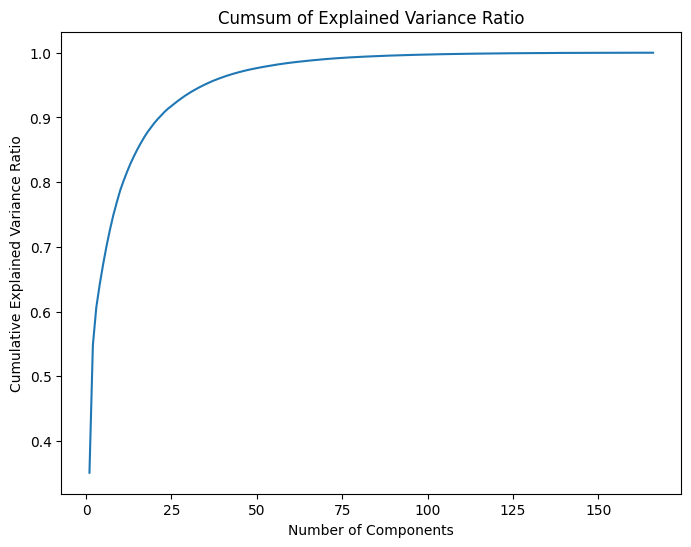

In [25]:
# plot the explained variance ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumsum of Explained Variance Ratio')
plt.show()

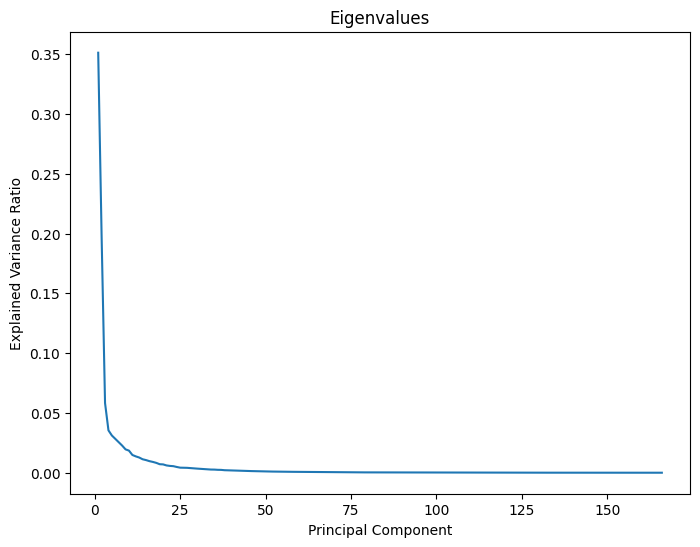

In [26]:
# plot pca.eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()